###Get Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#HOUSING_PATH = "/content/drive/MyDrive/myLMSCourses/ML/2021_22_evenSemBatch/Practicals/1_exercise1/"
HOUSING_PATH = "/content/drive/MyDrive/Colab Notebooks/" #upload the housing.tgz file into the drive and give the path here


In [ ]:
import os
import tarfile
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  tgz_path = os.path.join(housing_path, "housing.tgz")
  print(tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

housing = load_housing_data()

/content/drive/MyDrive/Colab Notebooks/housing.tgz


###Peek into Data

In [ ]:
# look at the top five rows of data using dataframe's head method
# Your code below
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Get a quick description of data using dataframe's info method; make a note of attributes with missing values in this notebook below this cell using a markdown cell.
# Your code below
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The attribute 'total_bedrooms' has null values as the result shows it has less than 20640(total no. of rows in the dataset) non-null values.

In [ ]:
# What kind of attribute is ocean_proximity? Discrete or continuous? If discrete, use value_counts method on the column corresponding
# to ocean_proximity and get a description?
# Your code below
ocean_proximity = housing["ocean_proximity"]
ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
# Use describe method on the dataframe to get a summary of the numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


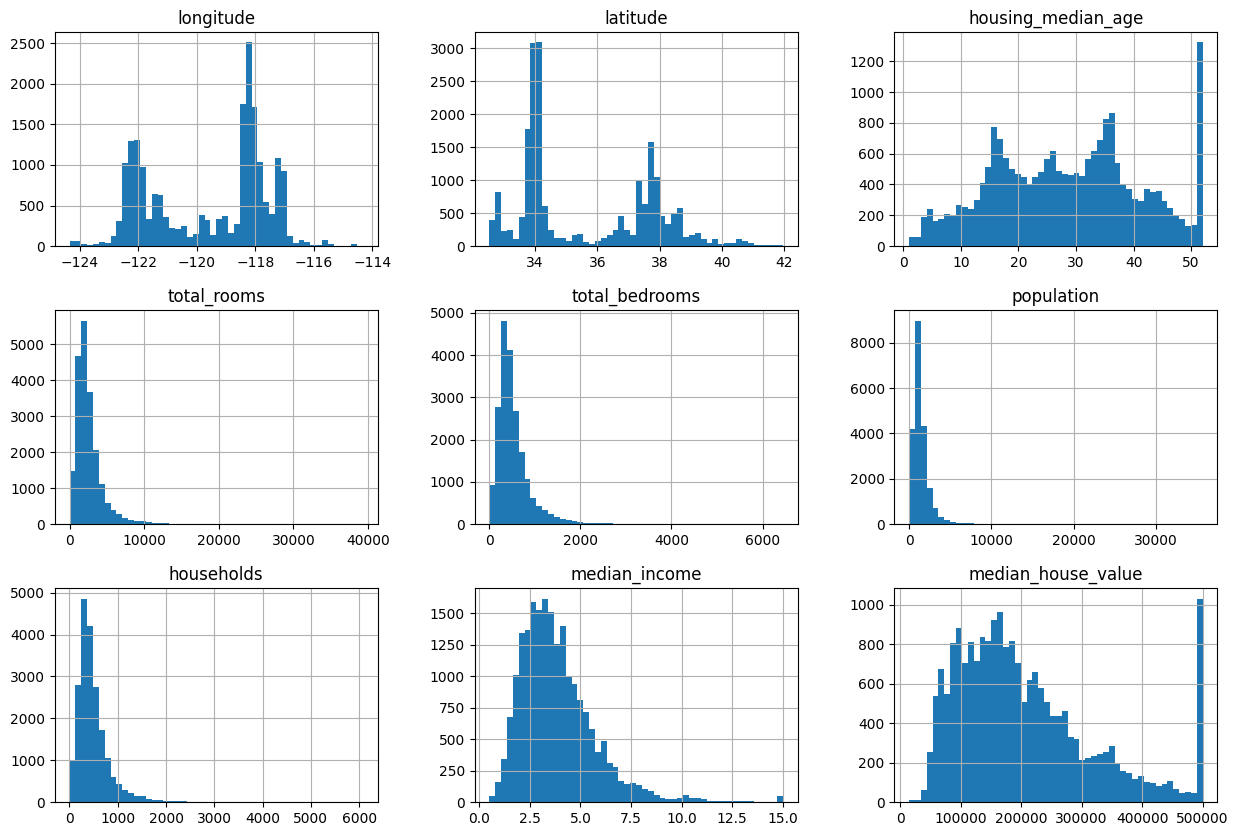

In [ ]:
# Numerical attributes can also be described using histograms
# Observe how many attributes are thick tailed? What about the scales of the attributes? Are they uniform or vastly different?
%matplotlib inline
import matplotlib.pyplot as plt
#use hist method on dataframe
# Your code below
housing.hist(bins=50, figsize=(15,10))
plt.show()

###Create Test Data
Why create test set now, right at the beginning? The reason is to avoid data snooping bias. That is, the more we look into data, our brain is powerful to capture the pattern seen in that data and will naturally influence our choice of the model. But that model may not generalize well during deployment since it was chosen simply based on some pattern seen in some sample data. So, it is better to separate out test set right in the beginning and keep it only for testing. We can do a pure random split of data into train and test set. For this you can look at train_test_split class in sklearn.model_selection. But, suppose your manager told that median income is an important attribute for predicting house price. Then, you would want to split data so that it reflects the various categories of median income in both train and test data. This is called as stratified sampling. Of course, median income is right now a numeric attribute. You have to create a new categorical attribute called income_cat, use that to split data into train and test sets, and then remove the income_cat attribute. To create income_cat, we can look at its respective histogram above and find that most median incomes are clustered around 1.5-6 (i.e \$15000-\$60000). So our categories could be 0-1.5, 1.5-3, 3-4.5, 4.5-6, >6.

In [ ]:
import numpy as np
# create income_cat attribute as described above
#housing["income_cat"] = # fill the code here; use cut method in pandas
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels=['0-1.5','1.5-3','3-4.5','4.5-6','>6'])

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,>6
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,>6
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,>6
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.5-6
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3-4.5


In [ ]:
# create train test stratified split (80-20 split) using income_cat attribute;
# use the train_test_split() method in sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Your code below
X = housing[["housing_median_age", "total_rooms", 'households', 'latitude',
             'longitude', 'population','ocean_proximity',
             'income_cat','median_house_value','median_income',
             'total_bedrooms']]
y = housing['median_house_value']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2,
                                                    random_state=0,
                                                    stratify=housing['income_cat'])

In [ ]:
# to check if the stratified split worked, compute and display the proportions of income categories in the test set and the whole dataset, and compare
# and make your observations in a markdown cell below.
# proportions in test set
test_set_proportions = test_X["income_cat"].value_counts() / len(test_X)

# proportions in full dataset
full_dataset_proportions = housing["income_cat"].value_counts() / len(housing)

# compare
comparison = pd.DataFrame({
    "Overall": full_dataset_proportions,
    "Test Set": test_set_proportions
}).sort_index()

# Calculate the difference between columns
comparison['Difference'] = abs(comparison['Overall'] - comparison['Test Set'])

# Calculate the average difference
average_difference = comparison['Difference'].mean()

print(comparison)
print("\nAverage Difference:", average_difference)

             Overall  Test Set  Difference
income_cat                                
0-1.5       0.039826  0.039971    0.000145
1.5-3       0.318847  0.318798    0.000048
3-4.5       0.350581  0.350533    0.000048
4.5-6       0.176308  0.176357    0.000048
>6          0.114438  0.114341    0.000097

Average Difference: 7.751937984495638e-05


In [ ]:
# drop the income_cat attribute from both train and test set; use dataframes's drop method
# Your code below
train_X = train_X.drop('income_cat', axis=1)
test_X = test_X.drop('income_cat', axis=1)

# Verify that the column has been dropped
print(train_X.columns)
print(test_X.columns)

Index(['housing_median_age', 'total_rooms', 'households', 'latitude',
       'longitude', 'population', 'ocean_proximity', 'median_house_value',
       'median_income', 'total_bedrooms'],
      dtype='object')
Index(['housing_median_age', 'total_rooms', 'households', 'latitude',
       'longitude', 'population', 'ocean_proximity', 'median_house_value',
       'median_income', 'total_bedrooms'],
      dtype='object')


In [ ]:
train_X.head()

,housing_median_age,total_rooms,households,latitude,longitude,population,ocean_proximity,median_house_value,median_income,total_bedrooms
19328,27.0,3894.0,715.0,38.48,-122.87,1832.0,<1H OCEAN,187800.0,3.5085,776.0
4806,49.0,1609.0,389.0,34.02,-118.34,896.0,<1H OCEAN,136600.0,2.5156,371.0
15645,52.0,3364.0,1045.0,37.79,-122.42,2112.0,NEAR BAY,400000.0,2.1343,1100.0
2975,8.0,11609.0,2100.0,35.32,-119.08,5696.0,INLAND,106300.0,5.0012,2141.0
18823,40.0,3272.0,553.0,41.78,-121.62,1467.0,INLAND,43500.0,1.7885,663.0


# **Explore Data**
We will explore train data more to gain more insights. We will not touch test data. It will only be used at the end when we build a model and we are ready to test it. Even for exploring train set, to be on the safer side, we will make a copy of it. We will first visualize train data using scatter plot. See the plot below carefully. A lot of information has been embedded into it. Answer the questions given in comments.

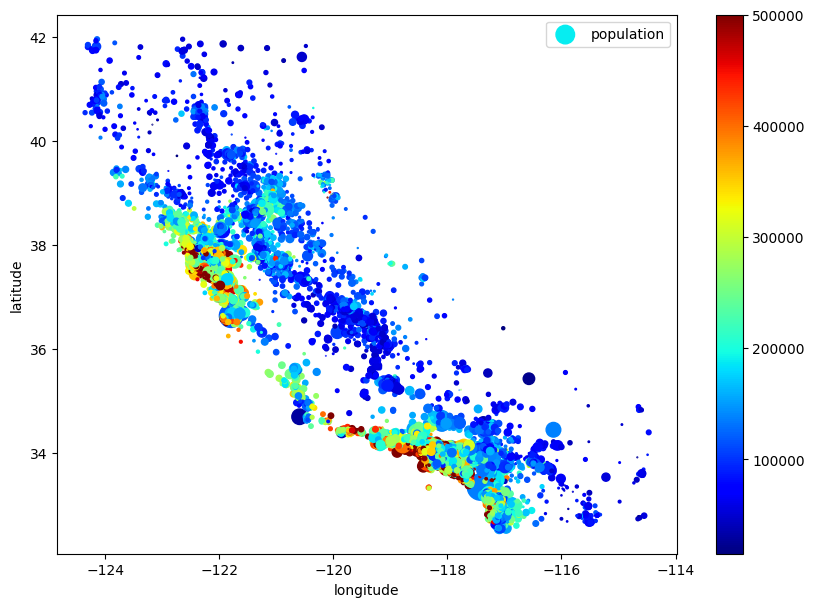

In [ ]:
housing = train_X.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=1, s=housing["population"]/100,
         label="population", figsize=(10,7), c=housing["median_house_value"], cmap=plt.get_cmap("jet"),
         colorbar=True)
plt.legend()

# What does the size of the scatter point indicate? What does the color of the scatter point indicate? What is the relationship
# between ocean_proximity and median_house_value (note that the ocean is towards the bottom left in the plot)? Is there relationship between population and median_house_value?
# Describe the role of alpha parameter in the dataframe's plot method.

The size of each point on the scatter plot indicates the population at that location (specified by latitude and longitude). Bigger the point,greater the population.

The color of the scatter plot gives the median house value at a location

The plot indicates that houses near the ocean are expensive.

The plot indicates that areas with less population have costlier houses

Alpha is used to adjust the transparency of the plot points

We will now look at linear correlations between median_house_value and all other attributes. Complete the code below and answer the questions given in comments. In case you are not familiar with the concept of Perason's correlation, read about it.

In [ ]:
# use dataframe's corr method to get correlation matrix of every pair of attributes
numeric_columns = housing.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()
print(corr_matrix)


# extract only median_house_value column from corr_matrix and sort it in descending order
# for sorting, use pandas series method sort_values
# Your code below
sorted_corr_matrix = corr_matrix['median_house_value'].sort_values(ascending=False)
sorted_corr_matrix

# Which attribute correlates positively highly with median_house_value? Are there attributes which have negligible linear correlations
# with median_house_value? What about negative linear correlations? Does a correlation value of zero or close to zero mean absolutely no relationship?

                    housing_median_age  total_rooms  households  latitude  \
housing_median_age            1.000000    -0.359020   -0.300751  0.010790   
total_rooms                  -0.359020     1.000000    0.918019 -0.034414   
households                   -0.300751     0.918019    1.000000 -0.069643   
latitude                      0.010790    -0.034414   -0.069643  1.000000   
longitude                    -0.108133     0.041642    0.051889 -0.924918   
population                   -0.293212     0.853603    0.903793 -0.106866   
median_house_value            0.107227     0.137430    0.069089 -0.145757   
median_income                -0.113308     0.196317    0.011745 -0.081483   
total_bedrooms               -0.317509     0.929544    0.980162 -0.064452   

                    longitude  population  median_house_value  median_income  \
housing_median_age  -0.108133   -0.293212            0.107227      -0.113308   
total_rooms          0.041642    0.853603            0.137430       0

median_house_value    1.000000
median_income         0.688988
total_rooms           0.137430
housing_median_age    0.107227
households            0.069089
total_bedrooms        0.053455
population           -0.023882
longitude            -0.042943
latitude             -0.145757
Name: median_house_value, dtype: float64

'median_income' correlates postively highly with 'median_house_value'
We canot conclude that a correlation co-efficient value of zero or close to zero implies no relationship


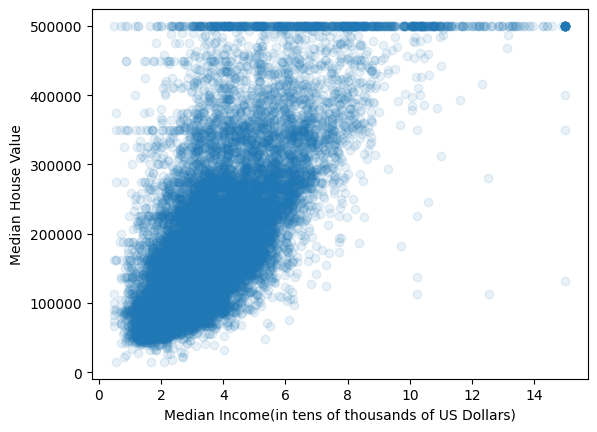

In [ ]:
# Since median_income highly correlates with median_house_value, let's focus on that.
 # Display a scatter plot of median_income vs median_house_value
 # Your code below
plt.scatter(housing['median_income'], housing['median_house_value'],alpha = 0.1)
plt.xlabel('Median Income(in tens of thousands of US Dollars)')
plt.ylabel('Median House Value')
plt.show()

 # Does the plot reveal anything? Change alpha value and see.

In [ ]:
housing.head()

,housing_median_age,total_rooms,households,latitude,longitude,population,ocean_proximity,median_house_value,median_income,total_bedrooms
19328,27.0,3894.0,715.0,38.48,-122.87,1832.0,<1H OCEAN,187800.0,3.5085,776.0
4806,49.0,1609.0,389.0,34.02,-118.34,896.0,<1H OCEAN,136600.0,2.5156,371.0
15645,52.0,3364.0,1045.0,37.79,-122.42,2112.0,NEAR BAY,400000.0,2.1343,1100.0
2975,8.0,11609.0,2100.0,35.32,-119.08,5696.0,INLAND,106300.0,5.0012,2141.0
18823,40.0,3272.0,553.0,41.78,-121.62,1467.0,INLAND,43500.0,1.7885,663.0


In [ ]:
# Attribute like total_rooms, total_bedrooms,
# population are too general to relate to house price
# Above correlations also show this
# Why not create population per household, rooms per household,
# ratio of bed_rooms to rooms?
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_bar_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [ ]:
housing.head()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 19328 to 8123
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        16512 non-null  float64
 1   total_rooms               16512 non-null  float64
 2   households                16512 non-null  float64
 3   latitude                  16512 non-null  float64
 4   longitude                 16512 non-null  float64
 5   population                16512 non-null  float64
 6   ocean_proximity           16512 non-null  object 
 7   median_house_value        16512 non-null  float64
 8   median_income             16512 non-null  float64
 9   total_bedrooms            16344 non-null  float64
 10  rooms_per_household       16512 non-null  float64
 11  bedrooms_bar_room         16344 non-null  float64
 12  population_per_household  16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [ ]:
# Now see the correlations of median_house_value to all the attributes including new attributes introduced above
# Your code below
numeric_columns = housing.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()

sorted_corr_matrix = corr_matrix['median_house_value'].sort_values(ascending=False)
sorted_corr_matrix
# Any new observations ??


median_house_value          1.000000
median_income               0.688988
rooms_per_household         0.157680
total_rooms                 0.137430
housing_median_age          0.107227
households                  0.069089
total_bedrooms              0.053455
population                 -0.023882
population_per_household   -0.026893
longitude                  -0.042943
latitude                   -0.145757
bedrooms_bar_room          -0.255922
Name: median_house_value, dtype: float64

We see that while 'total_rooms','rooms_per_household' and 'total_bedrooms' show a positive correlation with 'median_house_value'(which is expected),'bedrooms_bar_room',which represents the ratio of bedrooms to rooms,unexpectedly shows negative correlation. This tells us that expensive houses generally have a large number of rooms,most of which are NOT bedrooms.

Also, the attributes 'population' and 'population_per_household' have negative correlation with 'median_house_value' which tells that households with greater income tend to have less people in them.

# **Prepare (Preprocess) Data**
We have explored train data and found that some derived attributes may be useful. Now, we will need to preprocess and prepare the data before building the model to process the prepared data. For the data under consideration we need to do the following:

1. Separate the label (median_house_value) and
the rest of the attributes.
2. Fill the missing values in total_bedrooms attribute with median of rest of of the entries in it.
3. As we noted earlier, scales of attributes are vastly different. Bring all of them to uniform scale using standardization. That is, for each attribute (not the label), subtract mean of it from each of its entry and divide by its standard deviation. This way, all attributes will become zero centred and will have its scale in standard deviation units. There is another way called as normalization to bring all attributes into uniform scale. Here, for each attribute, subtract min of that attribute from each of its entry and divide by max minus min of that attribute. This will ensure the range of attribute is in [0, 1].Standardization is preferred over normalization generally since normalization are more sensitive to outliers than standardization. For eg, guess what will happen if one attribute had all the values in the range 0-15 except for one (which is 100). In normalization, the range will simply get crushed to [0, 0.15] whereas in standardization it is more likely to be wider.
4. Note that ocean_proximity is a categorical attribute. We need to convert it to numerical attribute before building the model. One way of doing this is to simply assign 0, 1, 2... to the categories. This might work in certain situations but not always. For eg, in the situation here, assigning 0 to <1H OCEAN, 1 to INLAND, 2 to NEAR OCEAN, 3 to NEAR BAY and 4 to ISLAND would mean to the model that NEAR OCEAN and INLAND are closer than NEAR OCEAN and <1H OCEAN, which is wrong. Instead, since there are 5 categories, we will represent each category by a binary vector of length 5 such that one unique component of this binary vector is 1 and rest are zero for this category, and so on. In other words, <1H OCEAN will be represented by 10000, INLAND will be represented by 01000, and so on. This is called as one hot encoding. We will be converting ocean_proximity into one hot encoding representation. One hot encoding will not be efficient if the number of catgories are very large. For eg, imagine that the categorical attribute is vocabulary and the number of categories are number of words in the vocabulary. But in the case here, we have only 5 categories. So, no problem with one hot encoding.

# **How do we go about transforming the data as mentioned above?**
We will take advantage of sklearn.



*   For filling missing values, we will use sklearn's SimpleImputer class from the Impute package. It deals only with numerical attributes.
*   For standardizing the scales of numerical attributes, we will use sklearn's StandardScaler class from the preprocessing package.

*   Since both of the above transforms deal with numerical attributes and they have to be in order (i.e first fill missing values, then standardize), we can set up a sklearn pipeline (we will call it numerical_pipeline) using Pipeline class from the pipeline package that will perform the above transforms in order.
*   For representing ocean_proximity in one hot encoding, we will use OneHotEncoder class from preprocessing package.

*   Numerical pipeline discussed above requires only numerical attributes. One hot encoding requires only categorical attributes. This means we need to extract numerical attributes separately, categorical attributes separately, perform the respective transforms and then combine again. This is cumbersome. What we need is to set up a single pipeline that will automatically do numerical pipeline on the numerical attributes, categorical pipeleine on the categorical attributes and finally output the preprocessed data. sklearn provides a ColumnTransformer class in compose package that can do this.






In [ ]:
housing.head()

,housing_median_age,total_rooms,households,latitude,longitude,population,ocean_proximity,median_house_value,median_income,total_bedrooms,rooms_per_household,bedrooms_bar_room,population_per_household
19328,27.0,3894.0,715.0,38.48,-122.87,1832.0,<1H OCEAN,187800.0,3.5085,776.0,5.446154,0.199281,2.562238
4806,49.0,1609.0,389.0,34.02,-118.34,896.0,<1H OCEAN,136600.0,2.5156,371.0,4.136247,0.230578,2.303342
15645,52.0,3364.0,1045.0,37.79,-122.42,2112.0,NEAR BAY,400000.0,2.1343,1100.0,3.219139,0.326992,2.021053
2975,8.0,11609.0,2100.0,35.32,-119.08,5696.0,INLAND,106300.0,5.0012,2141.0,5.528095,0.184426,2.712381
18823,40.0,3272.0,553.0,41.78,-121.62,1467.0,INLAND,43500.0,1.7885,663.0,5.916817,0.202628,2.652803


In [ ]:
# First separate the label median_house_value
housing_labels = housing["median_house_value"]


# drop the median_house_value from housing dataframe inplace
# Your code below
housing.drop(columns=['median_house_value'],inplace=True)



In [ ]:
housing.head()
housing_labels.info()

<class 'pandas.core.series.Series'>
Index: 16512 entries, 19328 to 8123
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
16512 non-null  float64
dtypes: float64(1)
memory usage: 258.0 KB


In [ ]:
# Fill any missing value with median value of the attribute it corresponds to
from sklearn.impute import SimpleImputer

# Pass 'median' as a keyword argument
imputer = SimpleImputer(strategy='median')

# Note that the imputer will be automatically used on
# numerical attributes once we set up the pipeline.
# Right now, we have instantiated it.

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()# Fill your code here; instantiate StandardScaler object


In [ ]:
from sklearn.pipeline import Pipeline

# Create a list of tuples defining the pipeline steps
steps = [('imputer', imputer), ('std_scaler', std_scaler)]

# Instantiate the Pipeline object with the steps
numerical_pipeline = Pipeline(steps)


# The way this pipeline works is as follows. When we call its fit_transform method on the data devoid of categorical attributes,
# it will first call the fit_transform method of the imputer object. The fit_transform method of the imputer object will first call
# fit method of the imputer object which will compute the median of all numerical attributes, respectively (based on their non-null values)
# and store it in statistics_ public variable and return itself. Then the transform method from SimpleImputer class is called on the returned
# imputer object which will fill the missing values with the respective median value picked up from statistics_ variable.
# The transform method returns the transformed data. This will then go as input to the fit method of the std_scaler transform in the
# pipeline. The fit method will compute mean and std dev with respect to each attribute and store them in mean_ and scale_ public variables,
# and return the std_scaler object itself. Then the transform method from the StandardScaler class is called on the returned std_scaler
# object which will do the standardization on each numerical attribute, respectively. The transformed data will be returned by the pipeline.

# Currently we are not calling the fit_tranform method on the pipeline because that will require data to be devoid of categorical
# attributes. As already explained earlier, we will not do that. Instead we will set up another pipeline which will handle
# this pipeline and the transforms on categorical attributes automatically.



In [ ]:
# represent ocen_proximity attribute in one hot vector encoding
from sklearn.preprocessing import OneHotEncoder

categorical_encoder = OneHotEncoder() # Fill your code here; instantiate OneHotEncoder object


In [ ]:
housing['ocean_proximity'].info()

<class 'pandas.core.series.Series'>
Index: 16512 entries, 19328 to 8123
Series name: ocean_proximity
Non-Null Count  Dtype 
--------------  ----- 
16512 non-null  object
dtypes: object(1)
memory usage: 258.0+ KB


In [ ]:
# set up the ColumnTransformer pipeline that will automatically deal with both numerical pipeline and OneHotEncoder transform.
from sklearn.compose import ColumnTransformer

numerical_attribs = list(housing.select_dtypes(include=['number']).columns)
                     # Fill your code here; get the list of numerical attribute names - first get all attribute names; then remove
                     # ocean proximity; Note that remove method of list does inplace removal and returns none if success; if you are
                     # using remove method, don't chain it with list creation; do it in the next line separately.
categorical_attribs = ['ocean_proximity']# Fill your code here; create a list with one entry which is ocean_proximity
# Define transformers
numerical_transformer = ('num', numerical_pipeline, numerical_attribs)
categorical_transformer = ('cat', categorical_encoder, categorical_attribs)

# Instantiate ColumnTransformer pipeline
full_pipeline = ColumnTransformer([
    numerical_transformer,
    categorical_transformer
])

housing_prepared = full_pipeline.fit_transform(housing) # Call fit_transform

# The pipeline works similar to what was already explained earlier.


In [ ]:
# Convert the NumPy array to a Pandas DataFrame
housing_prepared_df = pd.DataFrame(housing_prepared)

# Now you can use .head()
housing_prepared_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.128215,0.583222,0.567968,1.336628,-1.650449,0.355824,-0.190543,0.575364,0.008322,-0.237248,-0.046965,1.0,0.0,0.0,0.0,0.0
1,1.624665,-0.471694,-0.289200,-0.749932,0.610133,-0.465372,-0.712810,-0.395935,-0.535529,0.304686,-0.070666,1.0,0.0,0.0,0.0,0.0
2,1.863694,0.338537,1.435654,1.013819,-1.425888,0.601481,-0.913375,1.352403,-0.916297,1.974170,-0.096509,0.0,0.0,0.0,1.0,0.0
3,-1.642065,4.145006,4.209620,-0.141742,0.240854,3.745890,0.594621,3.849001,0.042343,-0.494476,-0.033220,0.0,1.0,0.0,0.0,0.0
4,0.907578,0.296064,0.142013,2.880494,-1.026668,0.035593,-1.095267,0.304360,0.203734,-0.179285,-0.038674,0.0,1.0,0.0,0.0,0.0


# Select and Train Model


Now that the data is prepared, we need to select a model, train it and see how it performs. Sometimes application and data can guide towards model selection. For example, if the volume of data is very large and the application is computer vision or natural language processing, neural networks are very powerful models. As one gains more experience, it becomes relatively easy to identify the family of models that would suit a particular problem at hand. However, one may not be able to nail down to the best model right at the first instance, even with experience. It is always an iterative process. Multiple models have to compared before finalizing on the model to be deployed. For now, we will only train a linear regression model in this notes.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # Fill your code here; instantiate LinearRegression object

# Now fit the data using fit the method on linear regression object
# Your code below
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
# let's try out this model on few instances from train data

sample_data = housing.head()    # Fill your code here; get first five rows from housing dataframe
sample_labels = housing_labels.head()   # Fill your code here; get first five labels from housing_labels pandas series
sample_data_prepared = full_pipeline.transform(sample_data) # Fill your code here; transform the sample_data using full_pipeline.
                # Note that you need to only transform this data; not fit. Fitting was already done.
predictions = lin_reg.predict(sample_data_prepared) # Fill your code here; get the predictions on sample_data using predict method on the already fitted linear regression object


print("Predictions: ", predictions)
print("Groundtruth: ", list(sample_labels))


Predictions:  [226429.81680517 198451.07184249 252798.83799232 235748.02807708
  10438.90640847]
Groundtruth:  [187800.0, 136600.0, 400000.0, 106300.0, 43500.0]


We can see that the predictions are not very close. Infact they are off by around 27% on average. We can check the performance on the entire training set. Before doing that, we need a way of quantifying the performance. There are three standard performance measure for linear regression viz. mean absolute error (MAE), mean squared error (MSE) and root mean squared error (RMSE).

MAE =  1n∑ni=1|(yi−y^i)|

MSE =  1n∑ni=1(yi−y^i)2

RMSE =  1n∑ni=1(yi−y^i)2−−−−−−−−−−−−−−√

The linear regression model can be fit by minimizing any of the above errors. Note that MSE punishes large errors more severely than MAE. So, MSE is sensitive to outliers than MAE. Further, minimizing MSE results in units of the response getting squared and so intrepretation becomes difficult. Hence, RMSE is preferred over MSE which maintains MSE. We will use RMSE below to see the performance, but we can try with any of the above.

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"RMSE: {lin_rmse:.2f}")

RMSE: 68012.48


What this means is that the predictions are off by $68,012 on the training set. Is this a good performance on the train set? Compare this offset with the range of median_house_value between  25th  and  75th  percentile we had obtained earlier using dataframe's describe method. In fact the model is underfitting the data. We need to look for more complex models, like decision tree or random forest.

In [ ]:
housing_labels.describe()

count     16512.000000
mean     206705.400073
std      115473.008383
min       14999.000000
25%      119600.000000
50%      179250.000000
75%      264825.000000
max      500001.000000
Name: median_house_value, dtype: float64

# Fine-tune Model
We saw that the model was underfitting. In some cases, the model may overfit (i.e give 0 train error). We know that we should look for better models. But, since we have now studied only regression, we need to wait until we pick other models. In any case, in the end-end ML solution, once we fit the model, we try to finetune its hyperparameters using a validation dataset. That is, we try different values of hyperparameters for the model, check its performance on the validation set and choose the one which gives the best performance. The validation dataset should neither intersect with train nor the test set. If it intersects with trainset, the model is likely to overfit depending on the amount of intersection. And we know that the test set is not to be touched at all during training. In linear regression, the only hyper parameter we can think of tuning is whether to have the intercept parmeter or not. However, in the example we are studying here, the performance is not going to change (check for yourself). So, we will not not be doing any hyperparameter finetuning here. But remember that this step is important in the end-end ML solution. We will understand more about hyperparameters as we go along.

Of course, we can also a lot of analysis like what we had one in our earlier linear regression notes to finetune the model. I leave that as optional exercise.

# Evaluation on Test Set
Assume that the linear regression model is the best model we have got after all the above steps. Now, we will test the model on the test set.

In [ ]:
X_test = test_X.drop("median_house_value",axis = 1)# Fill your code here; drop median_house_value from strat_test_set
test_labels = test_X["median_house_value"].copy()# Fill your code here; get a copy of median_house_value column from strat_test_set

# add the derived attributes rooms_per_household, bedrooms_per_room, population_per_household
# Your code below

X_test["rooms_per_household"] = X_test["total_rooms"] / X_test["households"]
X_test["bedrooms_bar_room"] = X_test["total_bedrooms"] / X_test["total_rooms"]
X_test["population_per_household"] = X_test["population"] / X_test["households"]

X_test_prepared = full_pipeline.transform(X_test)
test_predictions = lin_reg.predict(X_test_prepared)
test_mse = mean_squared_error(test_labels, test_predictions)
test_rmse = np.sqrt(test_mse) # Compute test rmse

print(f"RMSE: {test_rmse:.2f}")

RMSE: 67474.59


# Pre-launch
Before you launch the model, you need to present it to your team to get their final approval. So, as a pre-launch exercise, you will submit the completed assignment to me.

# Launch
You can launch your model as webservice through a REST API or through some other means. We will not dicuss that now.